<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Diabetes_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the dataset
file_path = "/content/diabetes.csv"  # Update the path if needed
df = pd.read_csv(file_path)

In [15]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [17]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/diabetes.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'diabetes.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 520 rows and 17 columns


In [18]:
df1.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [19]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) # cast to int
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

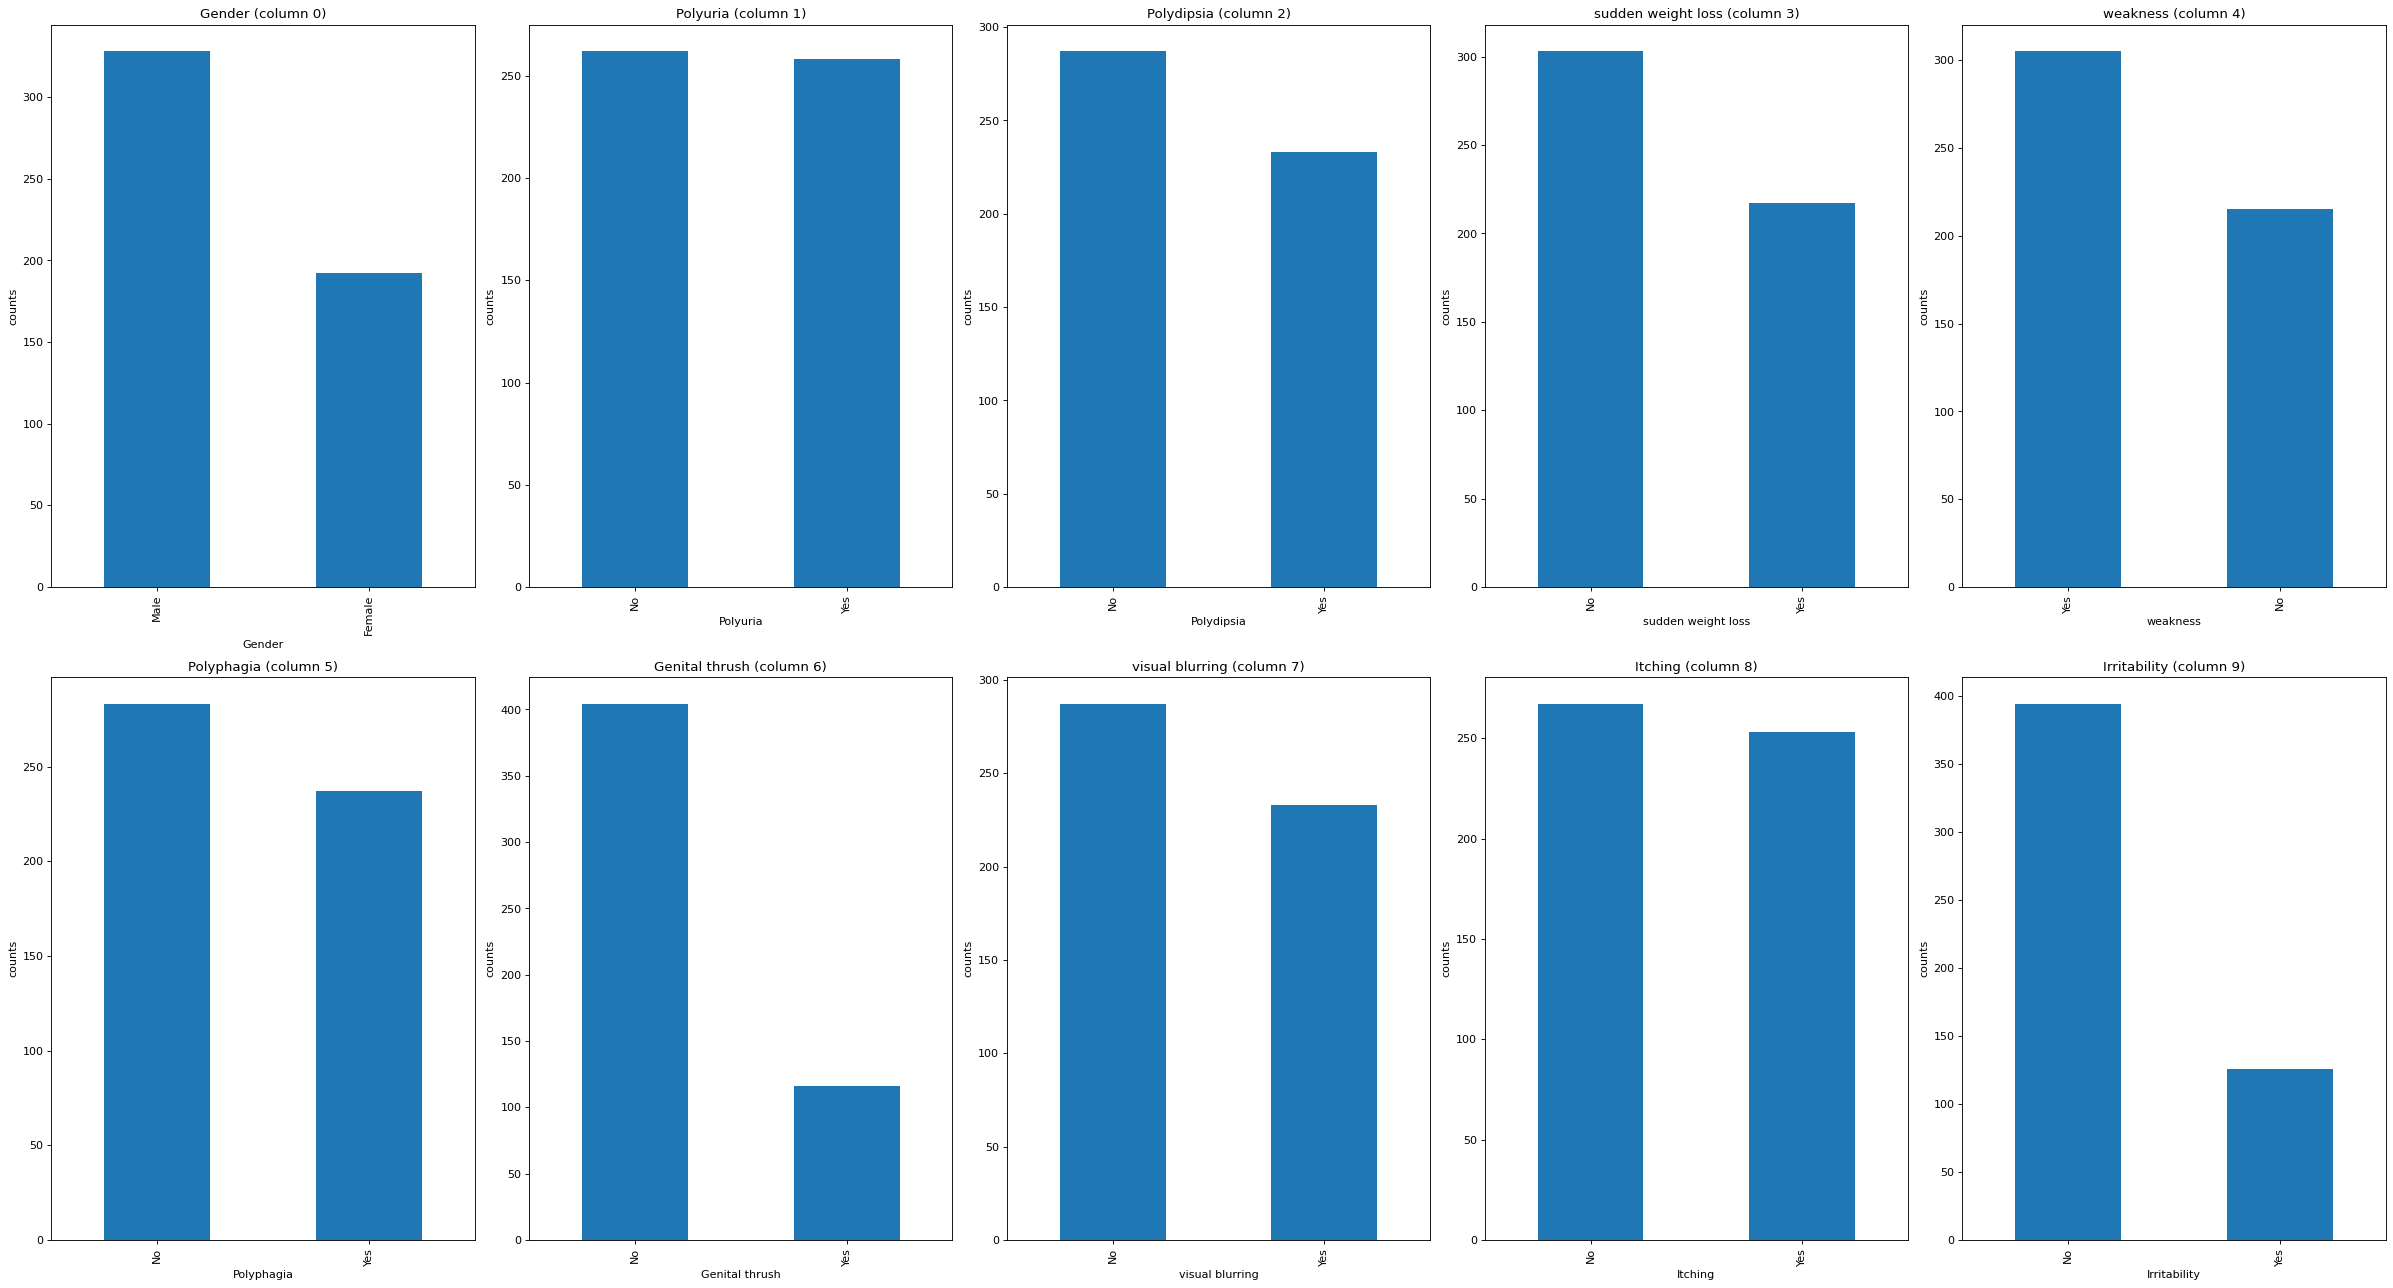

In [20]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 640x640 with 0 Axes>

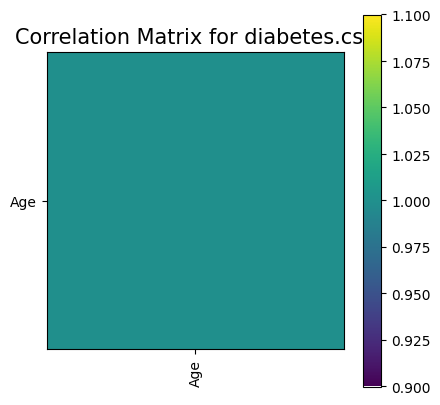

In [39]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    df = df.select_dtypes(include =np.number)
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    # if fignum is not None, a figure already exists, so don't pass figsize
    corrMat = plt.matshow(corr) # Removed fignum=1 argument
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Call it with your DataFrame
plotCorrelationMatrix(df1, 8)

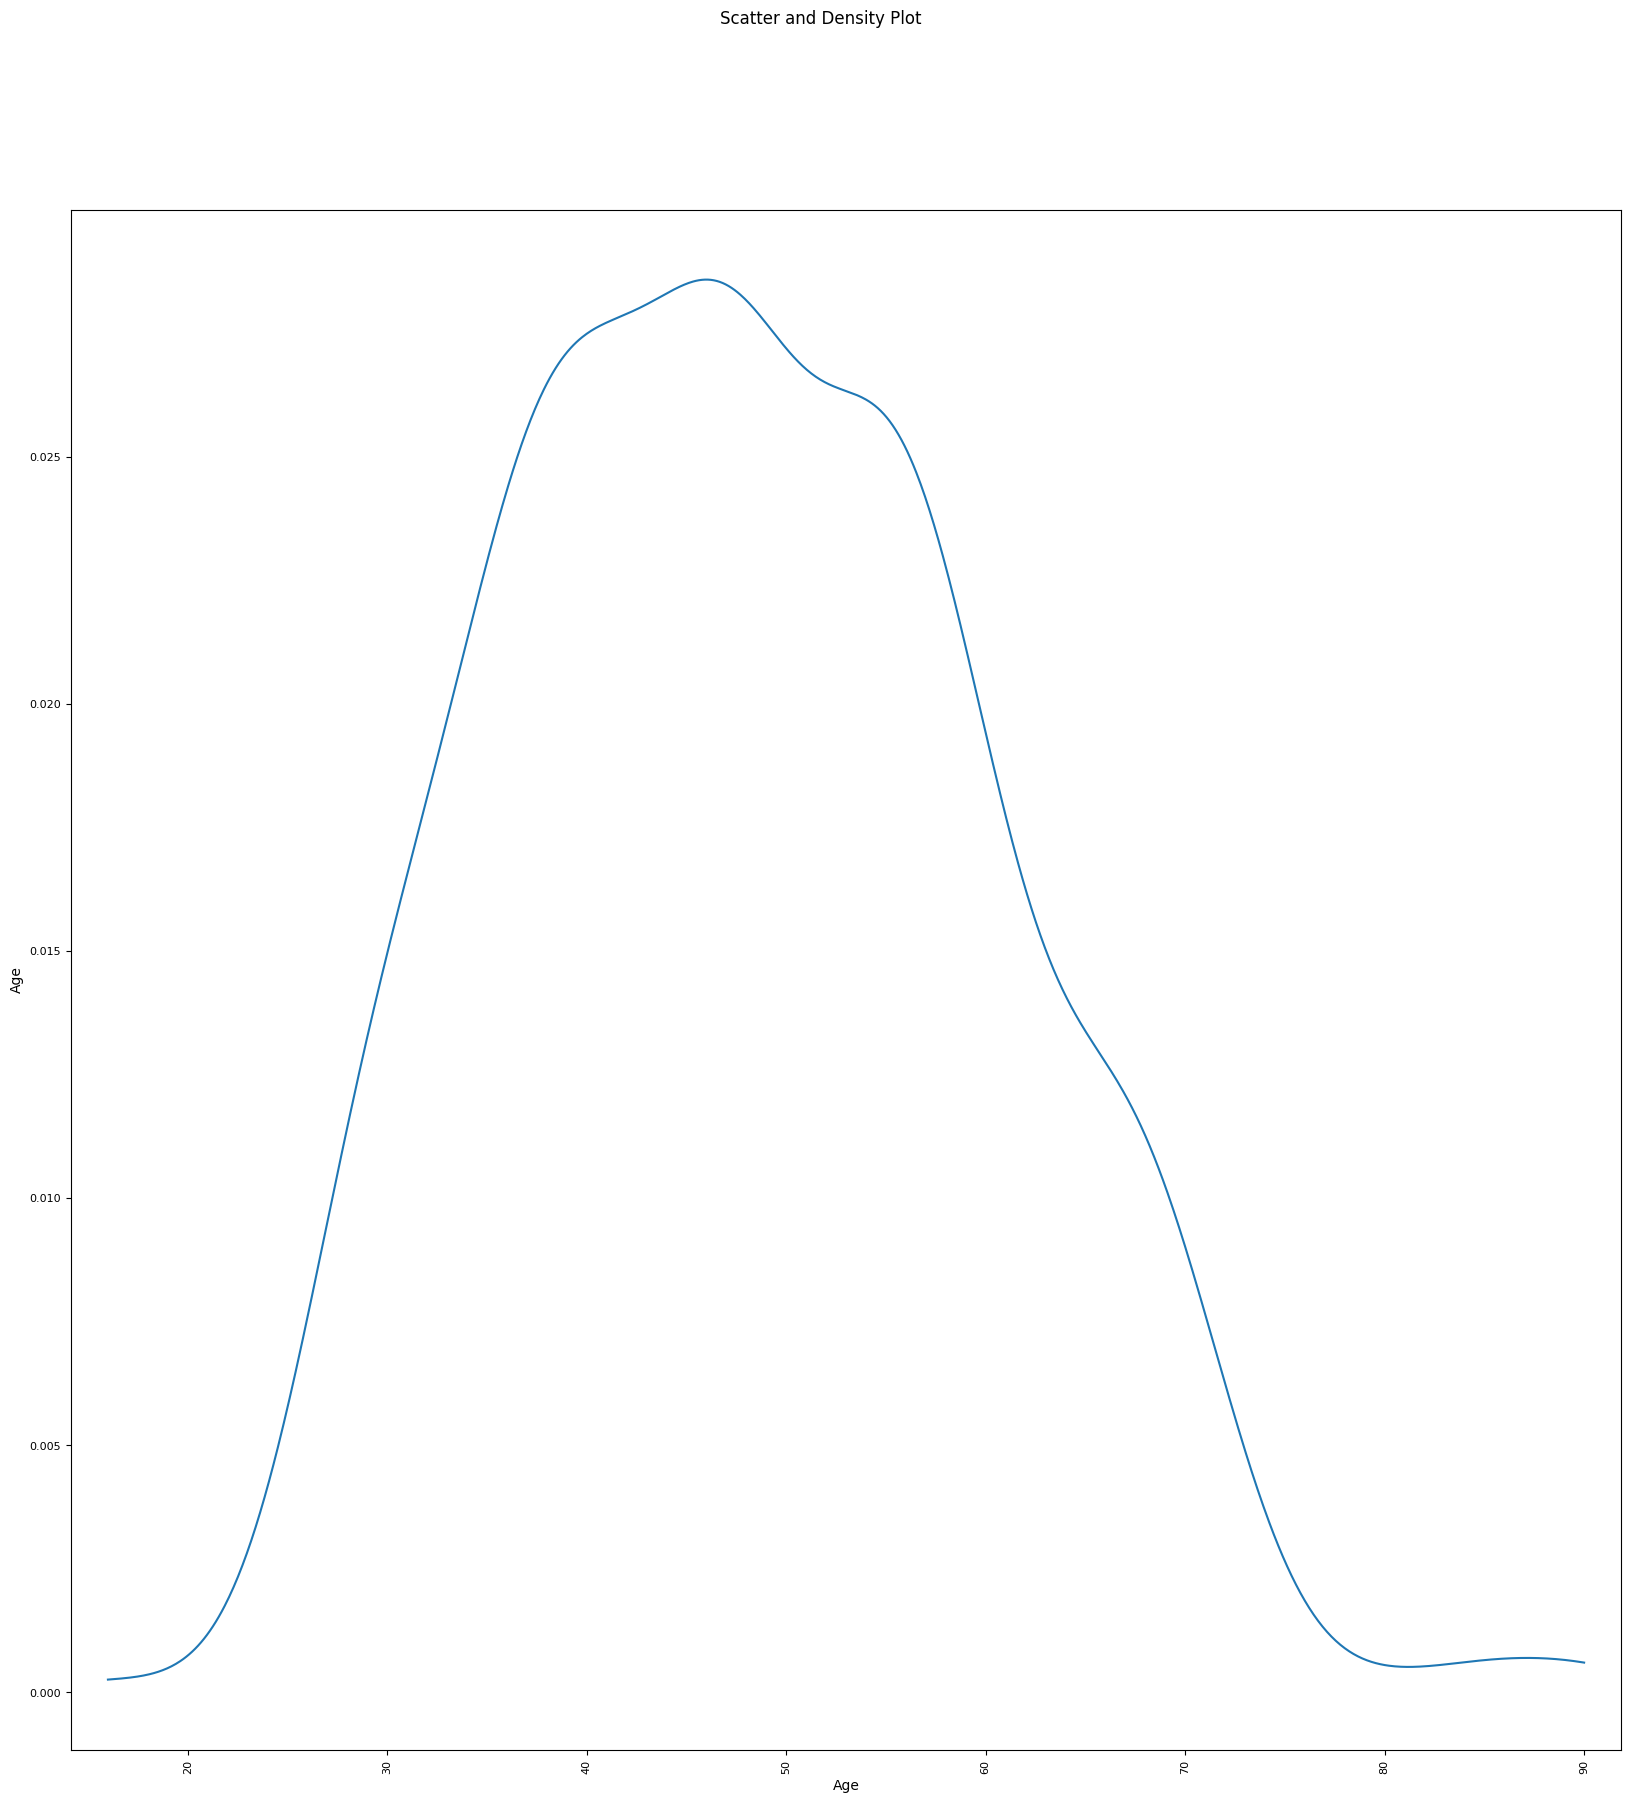

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df1, 20, 10)

In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# Path to your dataset
data = pd.read_csv("/content/diabetes.csv")

# Split features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column (assumed to be the target)

y = y.map({'Positive': 1, 'Negative': 0})

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Normalize input data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Define the Shallow Neural Network model
snn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # 1 hidden layer with 16 neurons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
snn_model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4470 - loss: 0.8419 - val_accuracy: 0.5865 - val_loss: 0.6644
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6162 - loss: 0.6541 - val_accuracy: 0.7981 - val_loss: 0.5470
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7622 - loss: 0.5269 - val_accuracy: 0.8654 - val_loss: 0.4599
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.4765 - val_accuracy: 0.8654 - val_loss: 0.3964
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.3893 - val_accuracy: 0.8750 - val_loss: 0.3478
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8739 - loss: 0.3622 - val_accuracy: 0.8846 - val_loss: 0.3142
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9086 - loss: 0.3242 - val_accuracy: 0.8846 - val_loss: 0.2876
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9383 - loss: 0.2630 - val_accuracy: 0.9135 - val_loss: 0.2682
Ep

In [42]:
# Define the Deep Neural Network model
dnn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5465 - loss: 0.6956 - val_accuracy: 0.8269 - val_loss: 0.4571
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9084 - loss: 0.3585 - val_accuracy: 0.9038 - val_loss: 0.2889
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9389 - loss: 0.2023 - val_accuracy: 0.9135 - val_loss: 0.2362
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9697 - loss: 0.1348 - val_accuracy: 0.9135 - val_loss: 0.2242
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9559 - loss: 0.1216 - val_accuracy: 0.9135 - val_loss: 0.1839
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9608 - loss: 0.1034 - val_accuracy: 0.9327 - val_loss: 0.1598
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9788 - loss: 0.0804 - val_accuracy: 0.9231 - val_loss: 0.1391
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9734 - loss: 0.0699 - val_accuracy: 0.9519 - val_loss

In [43]:
# Evaluate Shallow Model
snn_loss, snn_acc = snn_model.evaluate(X_test, y_test)
print(f"Shallow Neural Network Accuracy: {snn_acc:.4f}")

# Evaluate Deep Model
dnn_loss, dnn_acc = dnn_model.evaluate(X_test, y_test)
print(f"Deep Neural Network Accuracy: {dnn_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9387 - loss: 0.1928
Shallow Neural Network Accuracy: 0.9327
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9662 - loss: 0.0685
Deep Neural Network Accuracy: 0.9519
